In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submissions = pd.read_csv('submissionfile.csv')
vd = pd.read_csv('VariableDefinitions.csv')

In [3]:
train.shape

(23524, 13)

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [6]:
cols = train.columns
print(len(cols))
print(cols)

13
Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')


In [7]:
print(train.dtypes)

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [8]:
#checking the amount of unique values in each feature

def value_count(data, cols):
    for col in cols:
        value = data[col].value_counts().count()
        print('\n' + 'For column' + '                                     ' + col)
        print(value)
        

value_count(train, cols)


For column                                     country
4

For column                                     year
3

For column                                     uniqueid
8735

For column                                     bank_account
2

For column                                     location_type
2

For column                                     cellphone_access
2

For column                                     household_size
20

For column                                     age_of_respondent
85

For column                                     gender_of_respondent
2

For column                                     relationship_with_head
6

For column                                     marital_status
5

For column                                     education_level
6

For column                                     job_type
10


In [9]:
new_columns = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent',
                   'relationship_with_head', 'marital_status', 'education_level', 'job_type']

In [10]:
#checking the amount of unique values in each feature

def value_counts(data, cols):
    for col in cols:
        value = data[col].value_counts(normalize=True) * 100
        print('\n' 'For'+ ' ' + col)
        print(value)
        

value_counts(train, new_columns)


For country
Rwanda      37.132290
Tanzania    28.141473
Kenya       25.794933
Uganda       8.931304
Name: country, dtype: float64

For year
2016    37.132290
2018    34.726237
2017    28.141473
Name: year, dtype: float64

For bank_account
No     85.920762
Yes    14.079238
Name: bank_account, dtype: float64

For location_type
Rural    60.971774
Urban    39.028226
Name: location_type, dtype: float64

For cellphone_access
Yes    74.196565
No     25.803435
Name: cellphone_access, dtype: float64

For gender_of_respondent
Female    58.990818
Male      41.009182
Name: gender_of_respondent, dtype: float64

For relationship_with_head
Head of Household      54.544295
Spouse                 27.716375
Child                   9.475429
Parent                  4.616562
Other relative          2.839653
Other non-relatives     0.807686
Name: relationship_with_head, dtype: float64

For marital_status
Married/Living together    45.693760
Single/Never Married       33.935555
Widowed                    11

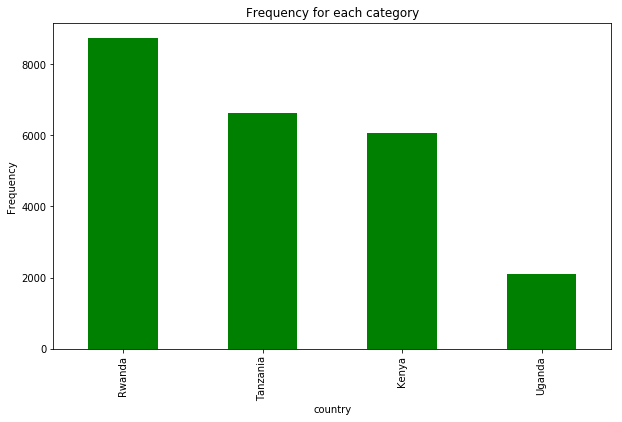

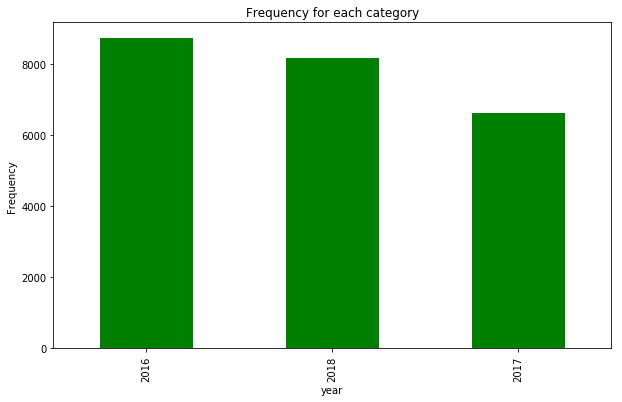

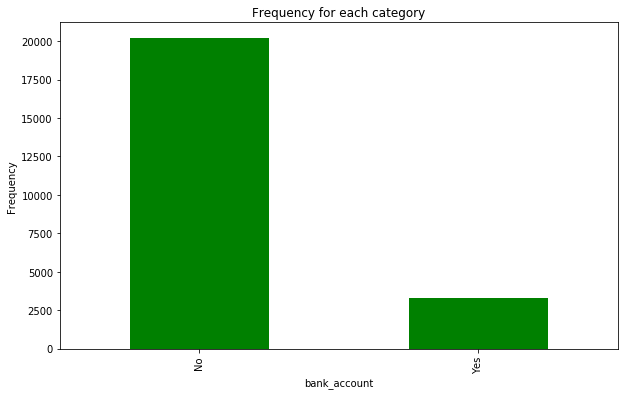

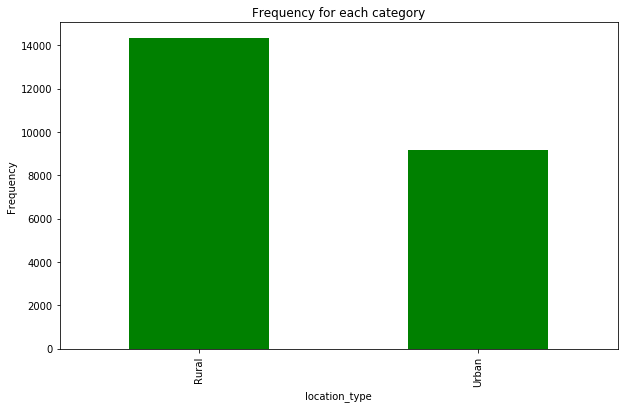

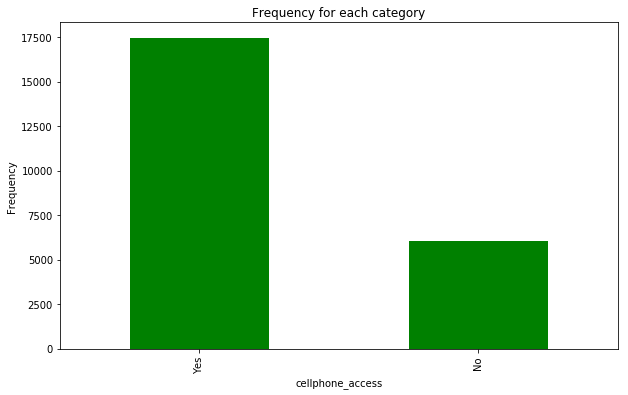

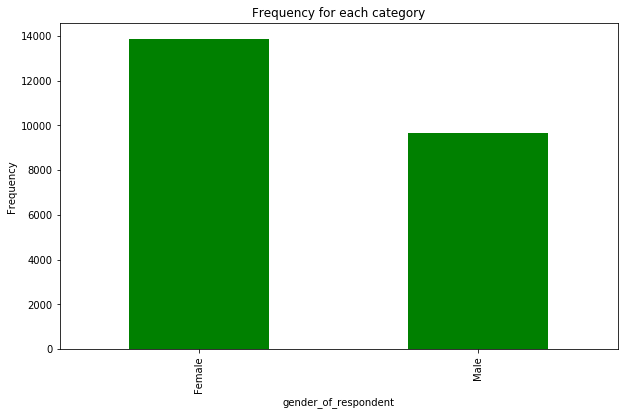

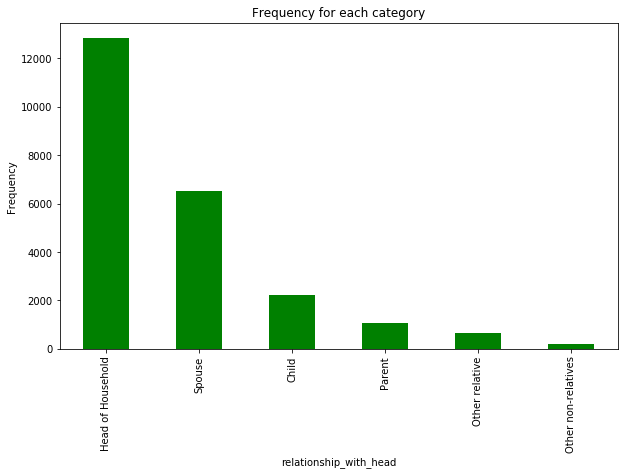

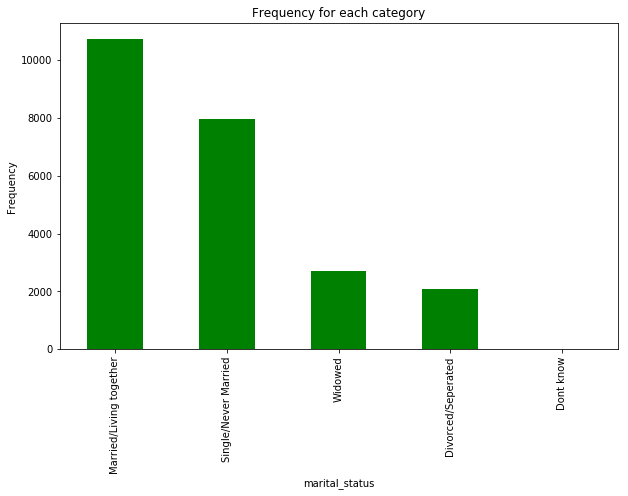

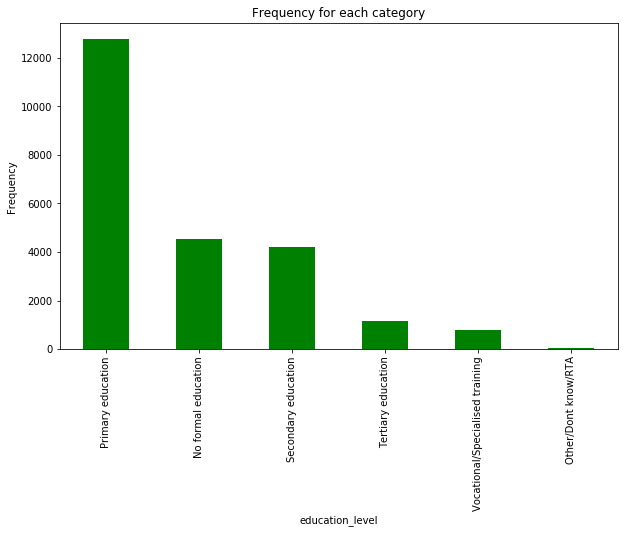

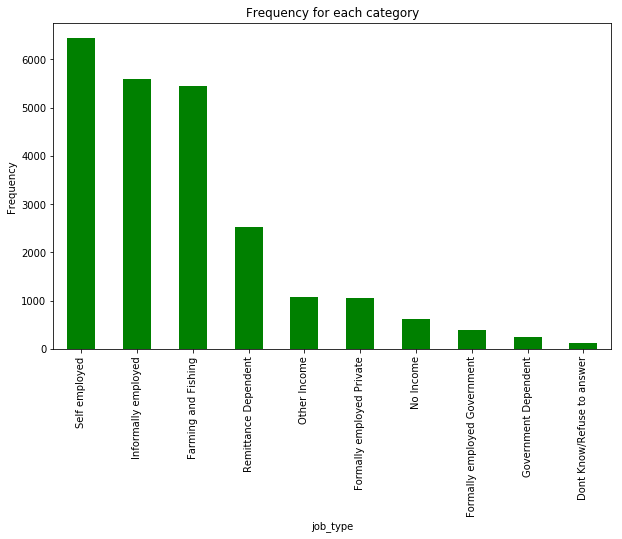

In [11]:
#checking frequency of each feature using bar chart
def plot_bar(data, cols):
    for col in cols:
        ax = data[col].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Frequency for each category", color= 'g')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
plot_bar(train, new_columns)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


AxesSubplot(0.125,0.125;0.775x0.755)


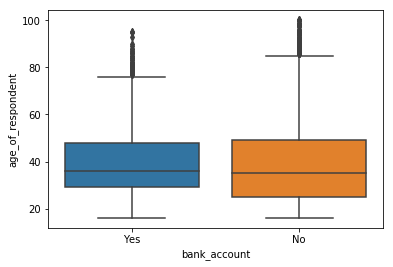

In [13]:
print(sns.boxplot(x='bank_account', y='age_of_respondent', data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


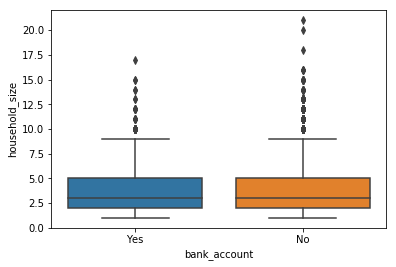

In [14]:
print(sns.boxplot(x='bank_account', y='household_size', data=train))

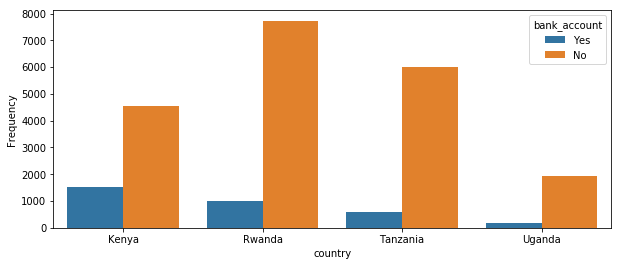

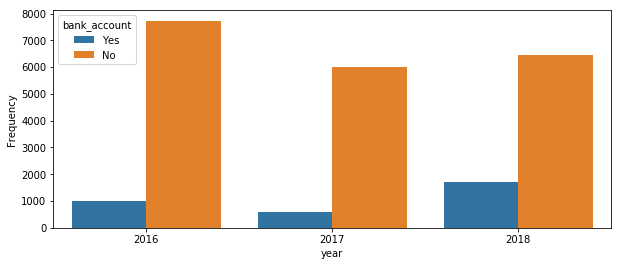

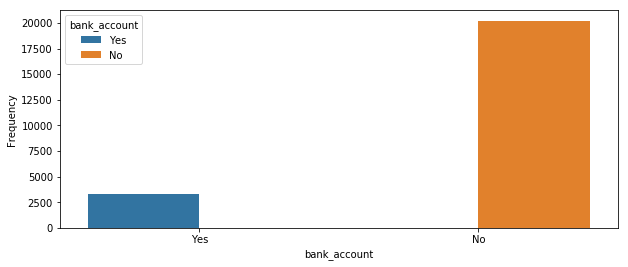

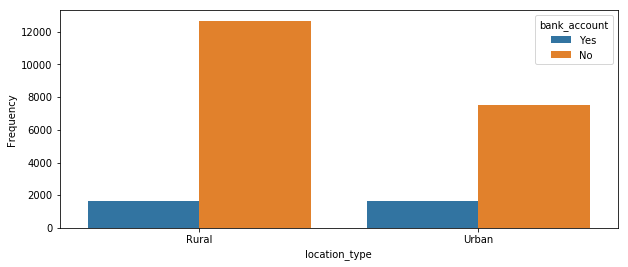

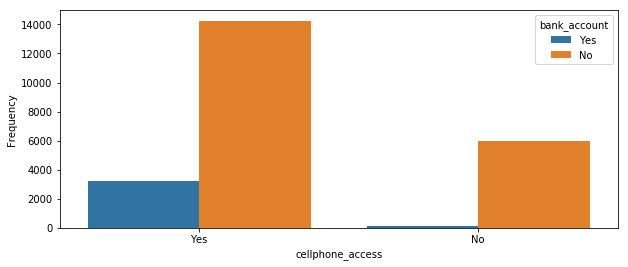

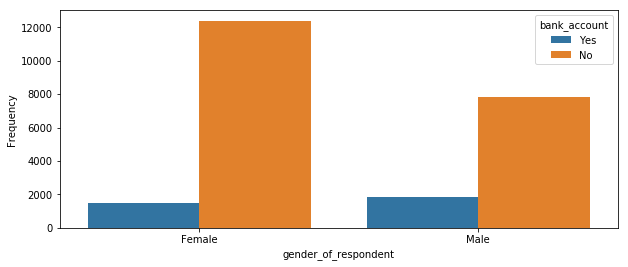

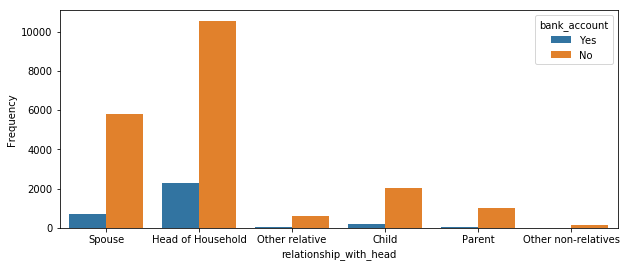

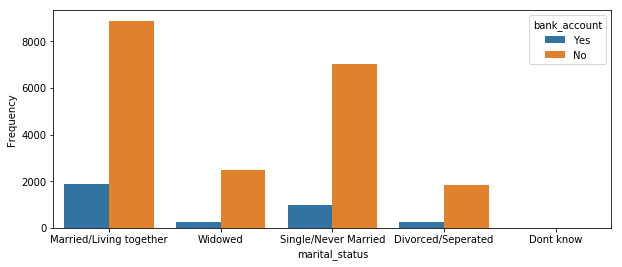

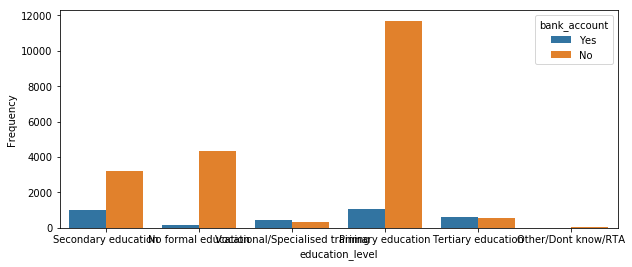

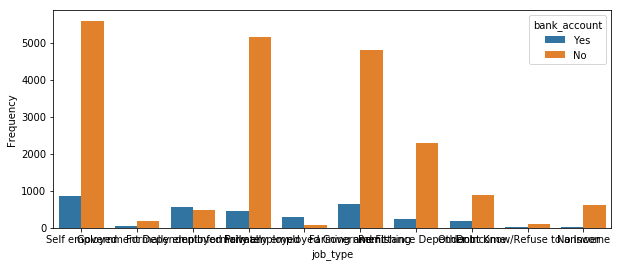

In [15]:
def label_check(data, cols):
    
    for i in cols:
        plt.figure(figsize=(10,4))
        sns.countplot(x=data[i], hue='bank_account', data=data)
        
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    
        
label_check(train, new_columns)

#ax = sns.countplot(x='relationship_with_head', hue='bank_account', data=train)

In [16]:
print(train['bank_account'].value_counts())

No     20212
Yes     3312
Name: bank_account, dtype: int64


In [17]:
labels = {'Yes': 1, 'No': 0}

train['bank_account'] = [labels[x] for x in train['bank_account']]
print(train['bank_account'].value_counts())

Labels = np.array(train['bank_account'])
print(Labels)

0    20212
1     3312
Name: bank_account, dtype: int64
[1 0 1 ... 0 0 0]


In [18]:
train['bank_account'].value_counts(normalize=True) * 100

0    85.920762
1    14.079238
Name: bank_account, dtype: float64

In [19]:
from sklearn import preprocessing

def encode_string(data):
    enc = preprocessing.LabelEncoder()
    enc.fit(data)
    enc_features = enc.transform(data)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_features.reshape(-1,1))
    return encoded.transform(enc_features.reshape(-1,1)).toarray()

In [20]:
categorical_columns = ['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
                       'marital_status', 'education_level', 'job_type']

Features_enc = encode_string(train['country'])
for col in categorical_columns:
    temp = encode_string(train[col])
    Features_enc = np.concatenate([Features_enc, temp], axis = 1)
    
print(Features_enc.shape)

test_enc = encode_string(test['country'])
for col in categorical_columns:
    temp1 = encode_string(test[col])
    test_enc = np.concatenate([test_enc, temp1], axis = 1)
    
print(test_enc.shape)

(23524, 37)
(10086, 37)


In [21]:
Features_enc = np.concatenate([Features_enc, np.array(train[['household_size', 'age_of_respondent', 'year']])], axis = 1)
print(Features_enc.shape)

test_enc = np.concatenate([test_enc, np.array(test[['household_size', 'age_of_respondent', 'year']])], axis = 1)
print(test_enc.shape)

(23524, 40)
(10086, 40)


In [22]:
scaler = preprocessing.StandardScaler().fit(Features_enc[:, 37:40])
Features_enc[:, 37:40] = scaler.transform(Features_enc[:, 37:40])
print(Features_enc[:5, 35:40])

[[ 0.          1.         -0.35800673 -0.89618796  1.20854126]
 [ 0.          0.          0.53983446  1.88827897  1.20854126]
 [ 0.          1.          0.53983446 -0.77512418  1.20854126]
 [ 0.          0.          0.53983446 -0.29086906  1.20854126]
 [ 0.          0.          1.88659625 -0.77512418  1.20854126]]


In [23]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, 37:40])
test_enc[:, 37:40] = scaler1.transform(test_enc[:, 37:40])
print(test_enc[:5, 35:40])

[[ 0.          0.         -0.35198335 -0.51067812  1.20863498]
 [ 0.          0.          1.45583541  0.78010077  1.20863498]
 [ 1.          0.         -0.35198335  2.37820797  1.20863498]
 [ 1.          0.          1.00388072  0.04251284  1.20863498]
 [ 1.          0.         -0.35198335 -1.37119738  1.20863498]]


In [24]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features_enc.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features_enc[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features_enc[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [25]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [26]:
print(x_train.shape)
print(x_train1.shape)
print(x_train_val.shape)
print(y_train.shape)
print(y_train1.shape)
print(y_train_val.shape)
print(x_test.shape)
print(y_test.shape)

(18819, 40)
(15055, 40)
(3764, 40)
(18819,)
(15055,)
(3764,)
(4705, 40)
(4705,)


In [27]:
xg_cl1 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 4000, seed = 123, max_depth = 8,
                           learning_rate=0.01, booster = 'gbtree', base_score = 0.8, subsample = 0.8,
                           reg_lambda = 0.03)

In [28]:
def print_format(f, x, y, z):
    print('Fold %1d     %4.3f         %4.3f        %4.3f'  %  (f, x, y, z))
    
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                  Confusion matrix')
    print('                 Score positive     Score negative')
    print('True positive    %6d' % conf[0,0] + '            %5d' % conf[0,1])
    print('True negative    %6d' % conf[1,0] + '            %5d' % conf[1,1])
    print('')
    print('Incorrect    %0.2f' % (1 - (sklm.accuracy_score(labels, scores))))
    print('')
    print('              Positive    Negative')
    print('Num case     %0.2f' % metrics[3][0] + '       %0.2f' % metrics[3][1])
    print('Precision       %0.2f' % metrics[0][0] + '       %0.2f' % metrics[0][1])
    print('Recall          %0.2f' % metrics[1][0] + '       %0.2f' % metrics[1][1])
    print('F1              %0.2f' % metrics[2][0] + '       %0.2f' % metrics[2][1])

In [47]:
def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall,   AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'],
                                             scores['test_recall_macro'],
                                             scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean     %4.3f        %4.3f        %4.3f'  %
         (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))
    print('Std      %4.3f        %4.3f      %4.3f'    %
         (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))
    
print_cv(scores)

         Precision     Recall,   AUC
Fold 1     0.743         0.664        0.820
Fold 2     0.769         0.682        0.842
Fold 3     0.740         0.675        0.822
Fold 4     0.744         0.685        0.832
Fold 5     0.748         0.672        0.843
Fold 6     0.752         0.677        0.843
Fold 7     0.708         0.664        0.828
Fold 8     0.734         0.675        0.822
Fold 9     0.698         0.645        0.831
Fold 10     0.691         0.641        0.811
----------------------------------------
Mean     0.733        0.668        0.829
Std      0.024        0.014      0.010


In [30]:
eval_set = [(x_train1, y_train1), (x_test, y_test)]
xg_cl1.fit(x_train1, y_train1, eval_metric="auc", eval_set=eval_set, verbose=True, early_stopping_rounds = 200)

[0]	validation_0-auc:0.83772	validation_1-auc:0.81204
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.85382	validation_1-auc:0.83789
[2]	validation_0-auc:0.85445	validation_1-auc:0.83854
[3]	validation_0-auc:0.85285	validation_1-auc:0.83911
[4]	validation_0-auc:0.85253	validation_1-auc:0.83922
[5]	validation_0-auc:0.85388	validation_1-auc:0.83988
[6]	validation_0-auc:0.85451	validation_1-auc:0.83897
[7]	validation_0-auc:0.85605	validation_1-auc:0.83943
[8]	validation_0-auc:0.85655	validation_1-auc:0.84064
[9]	validation_0-auc:0.85637	validation_1-auc:0.84173
[10]	validation_0-auc:0.85682	validation_1-auc:0.84315
[11]	validation_0-auc:0.85888	validation_1-auc:0.84493
[12]	validation_0-auc:0.85909	validation_1-auc:0.84547
[13]	validation_0-auc:0.85926	validation_1-auc:0.84541
[14]	validation_0-auc:0.85928	validation_1-auc:0.84544
[15]	validation_0-auc:0.859

[146]	validation_0-auc:0.88824	validation_1-auc:0.85696
[147]	validation_0-auc:0.88823	validation_1-auc:0.85703
[148]	validation_0-auc:0.88839	validation_1-auc:0.85700
[149]	validation_0-auc:0.88856	validation_1-auc:0.85698
[150]	validation_0-auc:0.88863	validation_1-auc:0.85716
[151]	validation_0-auc:0.88868	validation_1-auc:0.85717
[152]	validation_0-auc:0.88888	validation_1-auc:0.85715
[153]	validation_0-auc:0.88901	validation_1-auc:0.85701
[154]	validation_0-auc:0.88920	validation_1-auc:0.85702
[155]	validation_0-auc:0.88952	validation_1-auc:0.85684
[156]	validation_0-auc:0.88958	validation_1-auc:0.85676
[157]	validation_0-auc:0.88984	validation_1-auc:0.85676
[158]	validation_0-auc:0.89001	validation_1-auc:0.85671
[159]	validation_0-auc:0.89010	validation_1-auc:0.85671
[160]	validation_0-auc:0.89018	validation_1-auc:0.85679
[161]	validation_0-auc:0.89034	validation_1-auc:0.85677
[162]	validation_0-auc:0.89051	validation_1-auc:0.85673
[163]	validation_0-auc:0.89055	validation_1-auc:

[293]	validation_0-auc:0.90836	validation_1-auc:0.85733
[294]	validation_0-auc:0.90848	validation_1-auc:0.85738
[295]	validation_0-auc:0.90860	validation_1-auc:0.85739
[296]	validation_0-auc:0.90867	validation_1-auc:0.85728
[297]	validation_0-auc:0.90874	validation_1-auc:0.85724
[298]	validation_0-auc:0.90883	validation_1-auc:0.85725
[299]	validation_0-auc:0.90893	validation_1-auc:0.85727
[300]	validation_0-auc:0.90899	validation_1-auc:0.85731
[301]	validation_0-auc:0.90911	validation_1-auc:0.85744
[302]	validation_0-auc:0.90919	validation_1-auc:0.85738
[303]	validation_0-auc:0.90928	validation_1-auc:0.85735
[304]	validation_0-auc:0.90936	validation_1-auc:0.85731
[305]	validation_0-auc:0.90943	validation_1-auc:0.85739
[306]	validation_0-auc:0.90952	validation_1-auc:0.85745
[307]	validation_0-auc:0.90968	validation_1-auc:0.85752
[308]	validation_0-auc:0.90977	validation_1-auc:0.85754
[309]	validation_0-auc:0.90986	validation_1-auc:0.85756
[310]	validation_0-auc:0.90998	validation_1-auc:

[440]	validation_0-auc:0.92040	validation_1-auc:0.85654
[441]	validation_0-auc:0.92050	validation_1-auc:0.85656
[442]	validation_0-auc:0.92057	validation_1-auc:0.85647
[443]	validation_0-auc:0.92064	validation_1-auc:0.85645
[444]	validation_0-auc:0.92068	validation_1-auc:0.85641
[445]	validation_0-auc:0.92071	validation_1-auc:0.85638
[446]	validation_0-auc:0.92079	validation_1-auc:0.85637
[447]	validation_0-auc:0.92088	validation_1-auc:0.85636
[448]	validation_0-auc:0.92104	validation_1-auc:0.85640
[449]	validation_0-auc:0.92113	validation_1-auc:0.85640
[450]	validation_0-auc:0.92115	validation_1-auc:0.85641
[451]	validation_0-auc:0.92127	validation_1-auc:0.85640
[452]	validation_0-auc:0.92132	validation_1-auc:0.85637
[453]	validation_0-auc:0.92140	validation_1-auc:0.85629
[454]	validation_0-auc:0.92143	validation_1-auc:0.85631
[455]	validation_0-auc:0.92150	validation_1-auc:0.85629
[456]	validation_0-auc:0.92156	validation_1-auc:0.85625
[457]	validation_0-auc:0.92171	validation_1-auc:

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=4000, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [31]:
#making predictions on the validation data

preds = xg_cl1.predict(x_train_val)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
print_metrics(y_train_val, preds)

                  Confusion matrix
                 Score positive     Score negative
True positive      3186               90
True negative       321              167

Incorrect    0.11

              Positive    Negative
Num case     3276.00       488.00
Precision       0.91       0.65
Recall          0.97       0.34
F1              0.94       0.45


In [45]:
from sklearn.model_selection import cross_validate
labels_val = y_train1.reshape(y_train1.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
scores = ms.cross_validate(xg_cl1, x_train1, labels_val, scoring = scoring,
                          cv = 10, return_train_score=False)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

In [49]:
print_cv(scores)

         Precision     Recall,   AUC
Fold 1     0.743         0.664        0.820
Fold 2     0.769         0.682        0.842
Fold 3     0.740         0.675        0.822
Fold 4     0.744         0.685        0.832
Fold 5     0.748         0.672        0.843
Fold 6     0.752         0.677        0.843
Fold 7     0.708         0.664        0.828
Fold 8     0.734         0.675        0.822
Fold 9     0.698         0.645        0.831
Fold 10     0.691         0.641        0.811
----------------------------------------
Mean     0.733        0.668        0.829
Std      0.024        0.014      0.010


In [50]:
xg_cl2 = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 4000, seed = 123, max_depth = 8,
                           learning_rate=0.01, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

In [51]:
labels_val = y_train1.reshape(y_train1.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
scores2 = ms.cross_validate(xg_cl2, x_train1, labels_val, scoring = scoring,
                          cv = 10, return_train_score=False)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

In [54]:
print_cv(scores2)

         Precision     Recall,   AUC
Fold 1     0.733         0.658        0.820
Fold 2     0.770         0.680        0.842
Fold 3     0.745         0.680        0.820
Fold 4     0.746         0.688        0.832
Fold 5     0.754         0.676        0.844
Fold 6     0.756         0.678        0.843
Fold 7     0.706         0.660        0.828
Fold 8     0.737         0.678        0.822
Fold 9     0.693         0.644        0.830
Fold 10     0.690         0.645        0.810
----------------------------------------
Mean     0.733        0.668        0.829
Std      0.026        0.015      0.011


In [55]:
regressor = xgb.XGBRegressor(objective = 'reg:tweedie', n_estimators = 4000, seed = 123, max_depth = 8,
                           learning_rate=0.01, booster = 'gbtree', base_score = 0.7, subsample = 0.8,
                           reg_lambda = 0.03)

In [56]:
regressor

XGBRegressor(base_score=0.7, booster='gbtree', colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=None, max_depth=8,
       min_child_weight=None, missing=nan, monotone_constraints=None,
       n_estimators=4000, n_jobs=None, num_parallel_tree=None,
       objective='reg:tweedie', random_state=None, reg_alpha=None,
       reg_lambda=0.03, scale_pos_weight=None, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)

In [57]:
xg_cl1

XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=4000, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=123, reg_alpha=0,
       reg_lambda=0.03, scale_pos_weight=1, seed=123, subsample=0.8,
       tree_method=None, validate_parameters=False, verbosity=None)